In [222]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os
from tqdm import tqdm
from mappings import get_element_mapping, get_item_mapping, get_area_mapping
from utils import load_dataframe, get_element_from_mapping, reshape_dataframe, percentage_of_total

# Load

In [328]:
# os.listdir(os.getcwd()+'\data')

In [327]:
dirname = os.getcwd() + '\data\production'
# os.listdir(dirname)

In [326]:
filename = dirname + '\Production_CropsProcessed_E_All_Data_(Normalized).csv'
production = load_dataframe(filename)

In [71]:
elt_map = get_element_mapping(production)
item_map = get_item_mapping(production)
area_map = get_area_mapping(production)
print(' number of elements: {}\n number of items: {} \n number of areas: {}'\
      .format(len(elt_map), len(item_map), len(area_map)))

 number of elements: 1
 number of items: 21 
 number of areas: 242


In [74]:
production.columns

Index(['areacode', 'area', 'itemcode', 'item', 'elementcode', 'element',
       'yearcode', 'year', 'unit', 'value', 'flag'],
      dtype='object')

In [238]:
production.dtypes
# check that this is consistent throughout csv? anyways all the codes seem right.

areacode         int64
area            object
itemcode         int64
item            object
elementcode      int64
element         object
yearcode         int64
year             int64
unit            object
value          float64
flag            object
dtype: object

# Now take a closer look at the data

In [137]:
os.listdir(os.getcwd()+'\data')

['.ipynb_checkpoints',
 'Areas.csv',
 'country_groups.csv',
 'emissions_agriculture',
 'emissions_land',
 'environment',
 'Forestry_E_All_Data_(Normalized).csv',
 'inputs',
 'Population_E_All_Data_(Normalized).csv',
 'production']

In [139]:
regions = load_dataframe(os.getcwd()+'\data\country_groups.csv')

In [145]:
regions.countrygroup.unique()

array(['Africa', 'Americas', 'Annex I countries', 'Antarctic Region',
       'Asia', 'Australia and New Zealand', 'Caribbean',
       'Central America', 'Central Asia',
       'Central Asia and Southern Asia', 'East Asia (exc China)',
       'Eastern Africa', 'Eastern Asia',
       'Eastern Asia and South-eastern Asia', 'Eastern Europe', 'Europe',
       'European Union', 'High-income economies',
       'Land Locked Developing Countries',
       'Latin America and the Caribbean', 'Least Developed Countries',
       'Low income economies', 'Low Income Food Deficit Countries',
       'Lower-middle-income economies', 'Melanesia', 'Micronesia',
       'Middle Africa', 'Net Food Importing Developing Countries',
       'Non-Annex I countries', 'North Africa (exc Sudan)',
       'Northern Africa', 'Northern America',
       'Northern America and Europe', 'Northern Europe', 'Oceania',
       'Oceania excluding Australia and New Zealand', 'OECD', 'Polynesia',
       'Small Island Developing Sta

# Grouping data by area

### World

(1961, 2014)

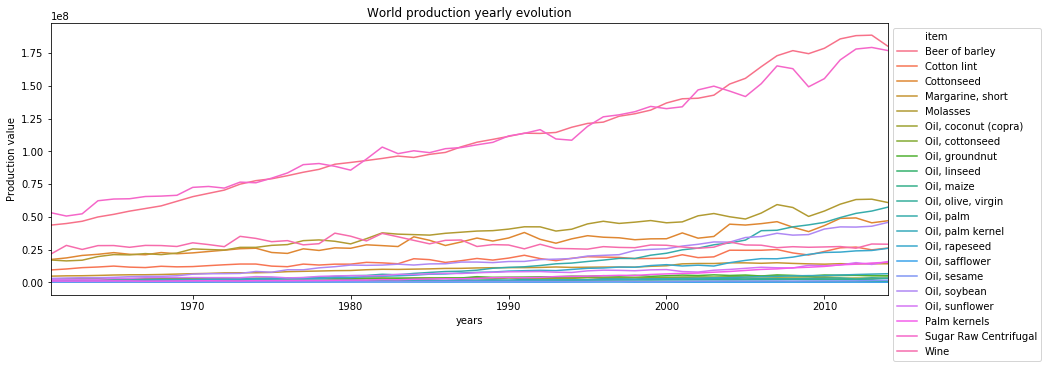

In [325]:
world  = production[production.area == 'World']

fig, ax = plt.subplots(figsize=(15,5))

sns.lineplot(x= 'year', y = 'value' ,hue = 'item', data = world)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);
ax.set_title("World production yearly evolution")
ax.set_ylabel("Production value")
ax.set_xlabel('years')
ax.set_xlim(left = 1961, right = 2014)

### Continents

(1961, 2014)

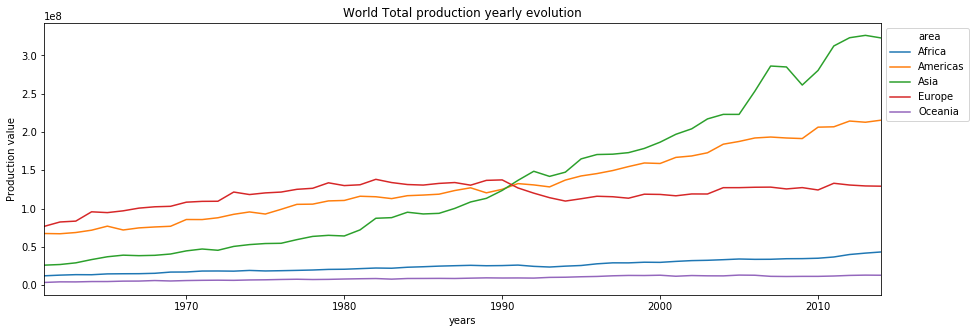

In [323]:
continents_list = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
continents  = production[production.area.isin(continents_list)]

fig, ax = plt.subplots(figsize=(15,5), nrows = 1)

sns.lineplot(x= 'year', y = 'value' ,hue = 'area', data = continents.groupby(['area', 'year']).agg({'value':'sum'}).reset_index(), ax = ax)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);
ax.set_title("World Total production yearly evolution")
ax.set_ylabel("Production value")
ax.set_yscale('linear')
ax.set_xlabel('years')
ax.set_xlim(left = 1961, right = 2014)

## Now look at each continent separately

#### Both log and linear scales but can't see clearly

5it [00:11,  2.33s/it]


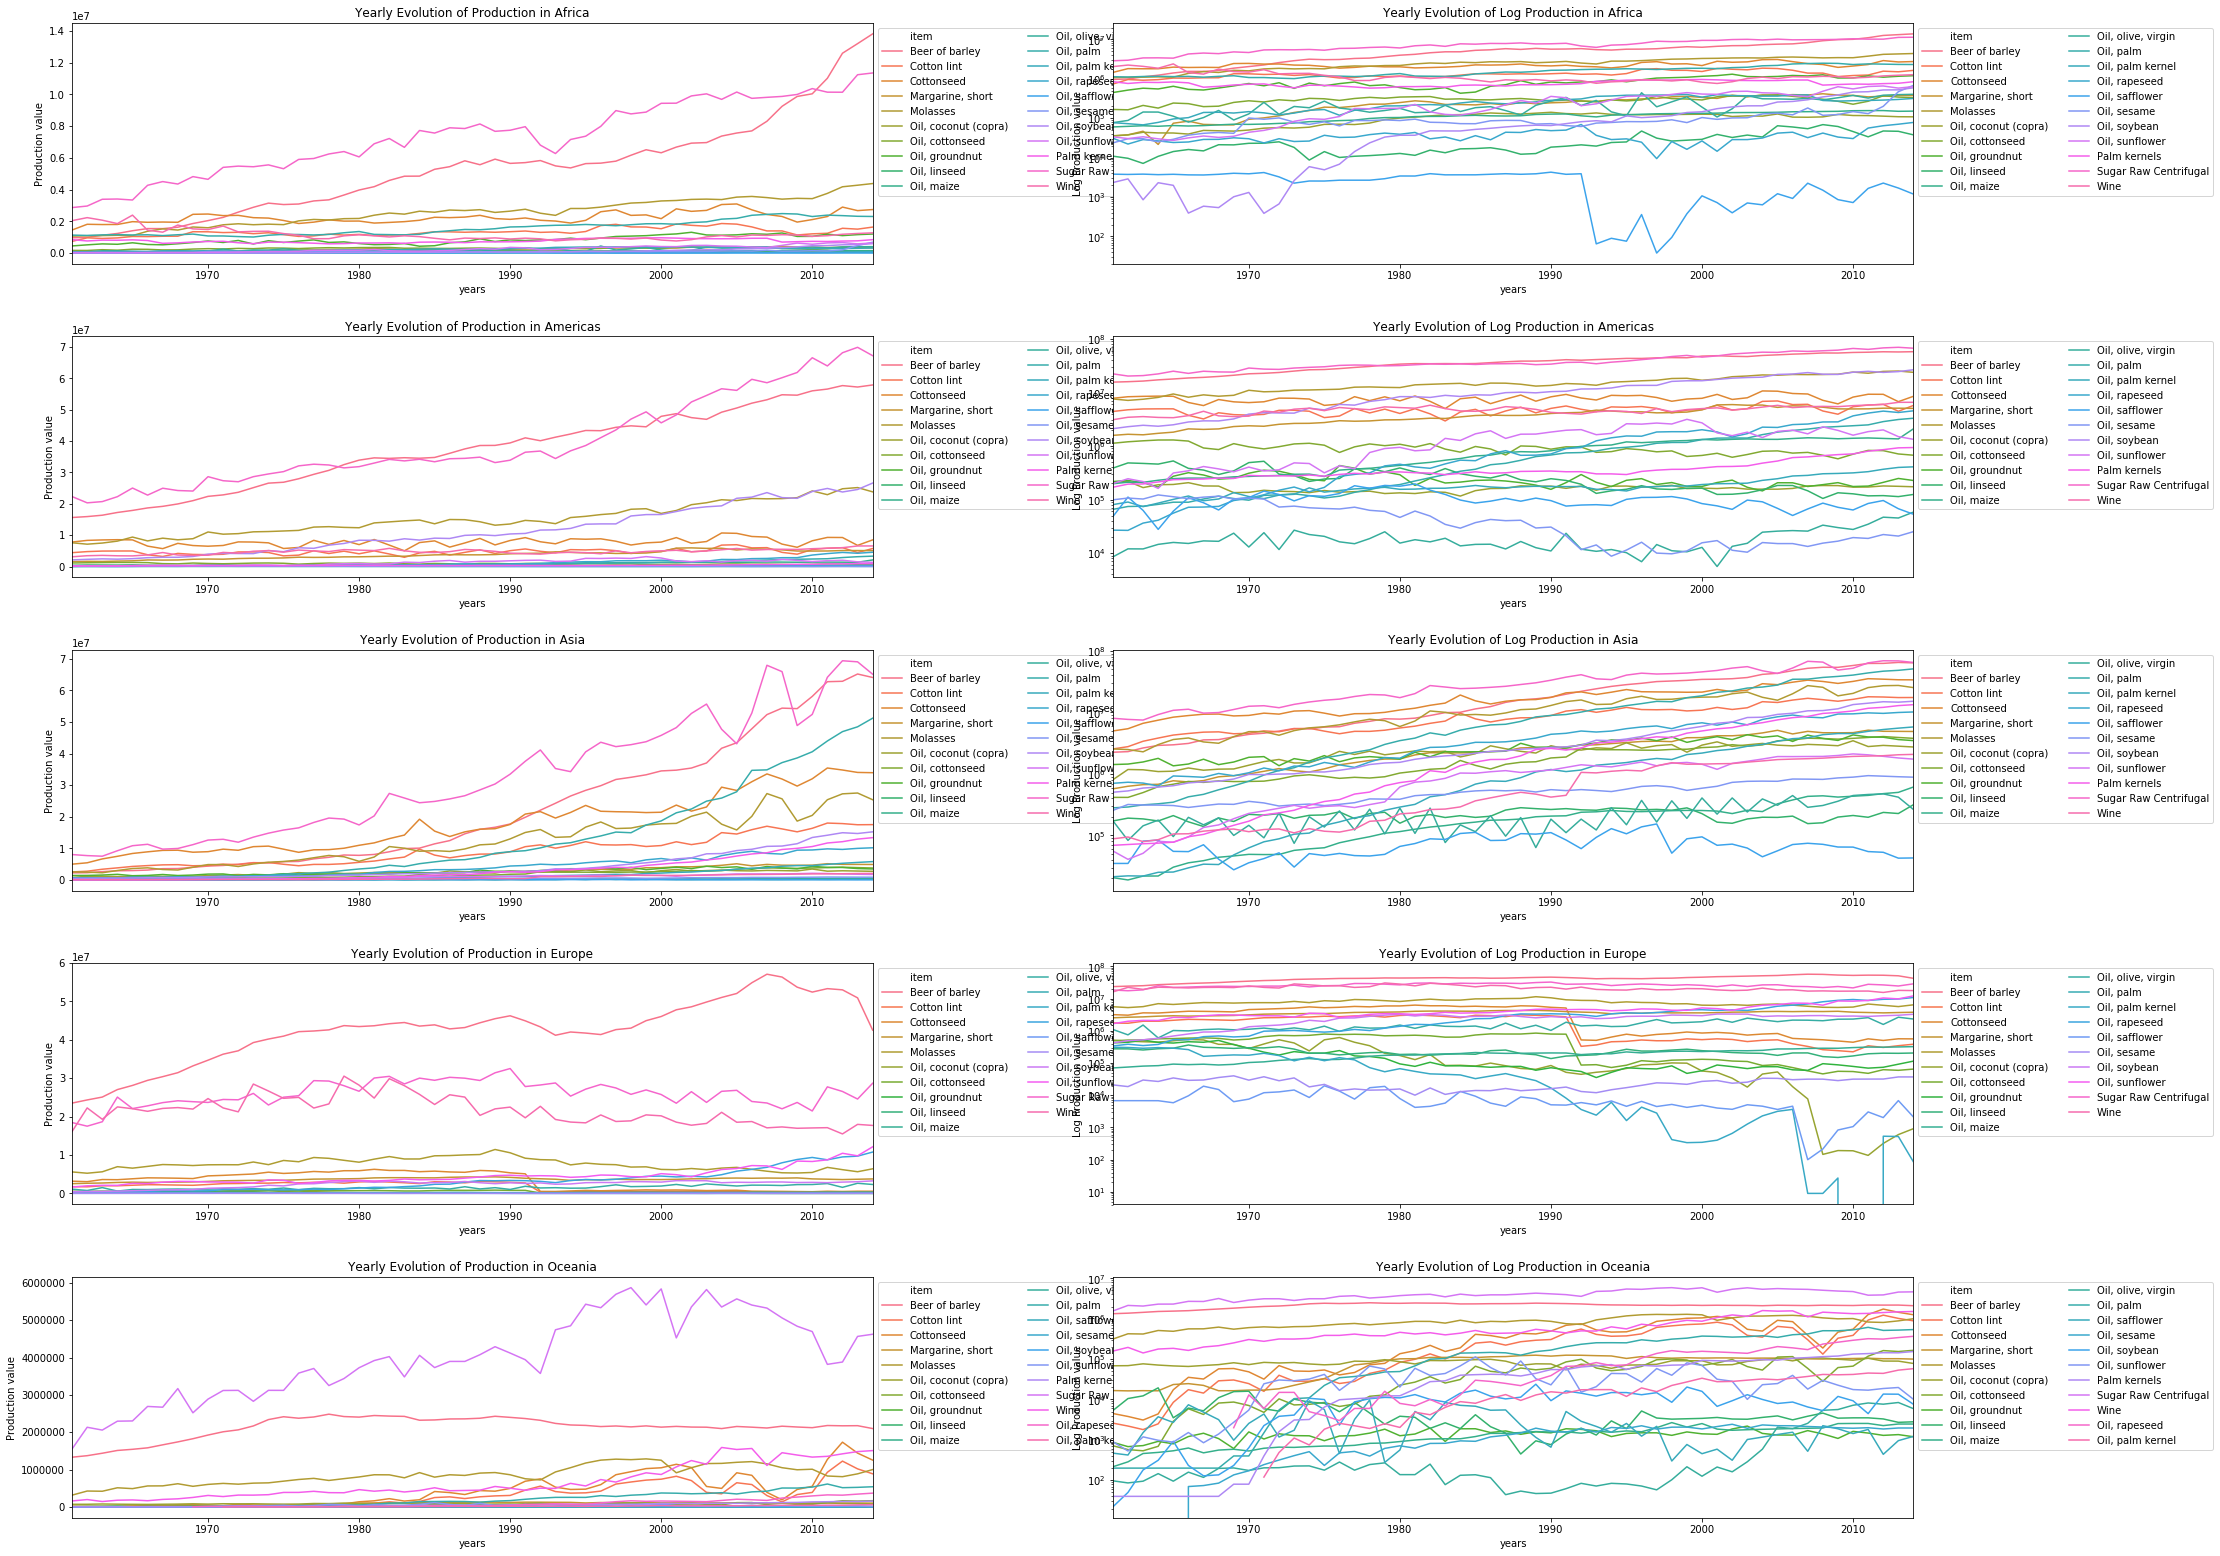

In [321]:
# should use widgets

fig, ax = plt.subplots( figsize = (15 * 2 * 1.1, 5 * len(continents_list) * 1.1), nrows = len(continents_list), ncols = 2)
plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.3)

for idx, val in tqdm(enumerate(continents_list)):
    sns.lineplot(x = 'year', y = 'value', hue = 'item', \
                 data = continents[continents.area == val].groupby(['year', 'item']).agg({'value':'sum'}, axis = 1).reset_index(), \
                 ax = ax[idx][0])
    ax[idx][0].legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 2)
    ax[idx][0].set_title('Yearly Evolution of Production in '+ val)
    ax[idx][0].set_ylabel("Production value")
    ax[idx][0].set_yscale('linear')
    ax[idx][0].set_xlabel('years')
    ax[idx][0].set_xlim(left = 1961, right = 2014)

    sns.lineplot(x = 'year', y = 'value', hue = 'item', \
                 data = continents[continents.area == val].groupby(['year', 'item']).agg({'value':'sum'}, axis = 1).reset_index(), \
                 ax = ax[idx][1])
    ax[idx][1].legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 2)
    ax[idx][1].set_title('Yearly Evolution of Log Production in '+ val)
    ax[idx][1].set_ylabel("Log Production value")
    ax[idx][1].set_yscale('log')
    ax[idx][1].set_xlabel('years')
    ax[idx][1].set_xlim(left = 1961, right = 2014)
    
    
    

## Grouping income areas together

In [303]:
mask = ['income' in regions.countrygroup[idx] for idx, val in enumerate(regions.countrygroup)]
income_list = regions[mask].rename(columns = {'country':'area'})
income_list.countrygroup.unique()
incomes = production.merge(income_list, how = 'left', on = 'area')

array(['High-income economies', 'Low income economies',
       'Lower-middle-income economies', 'Upper-middle-income economies'],
      dtype=object)

21it [00:14,  1.64it/s]


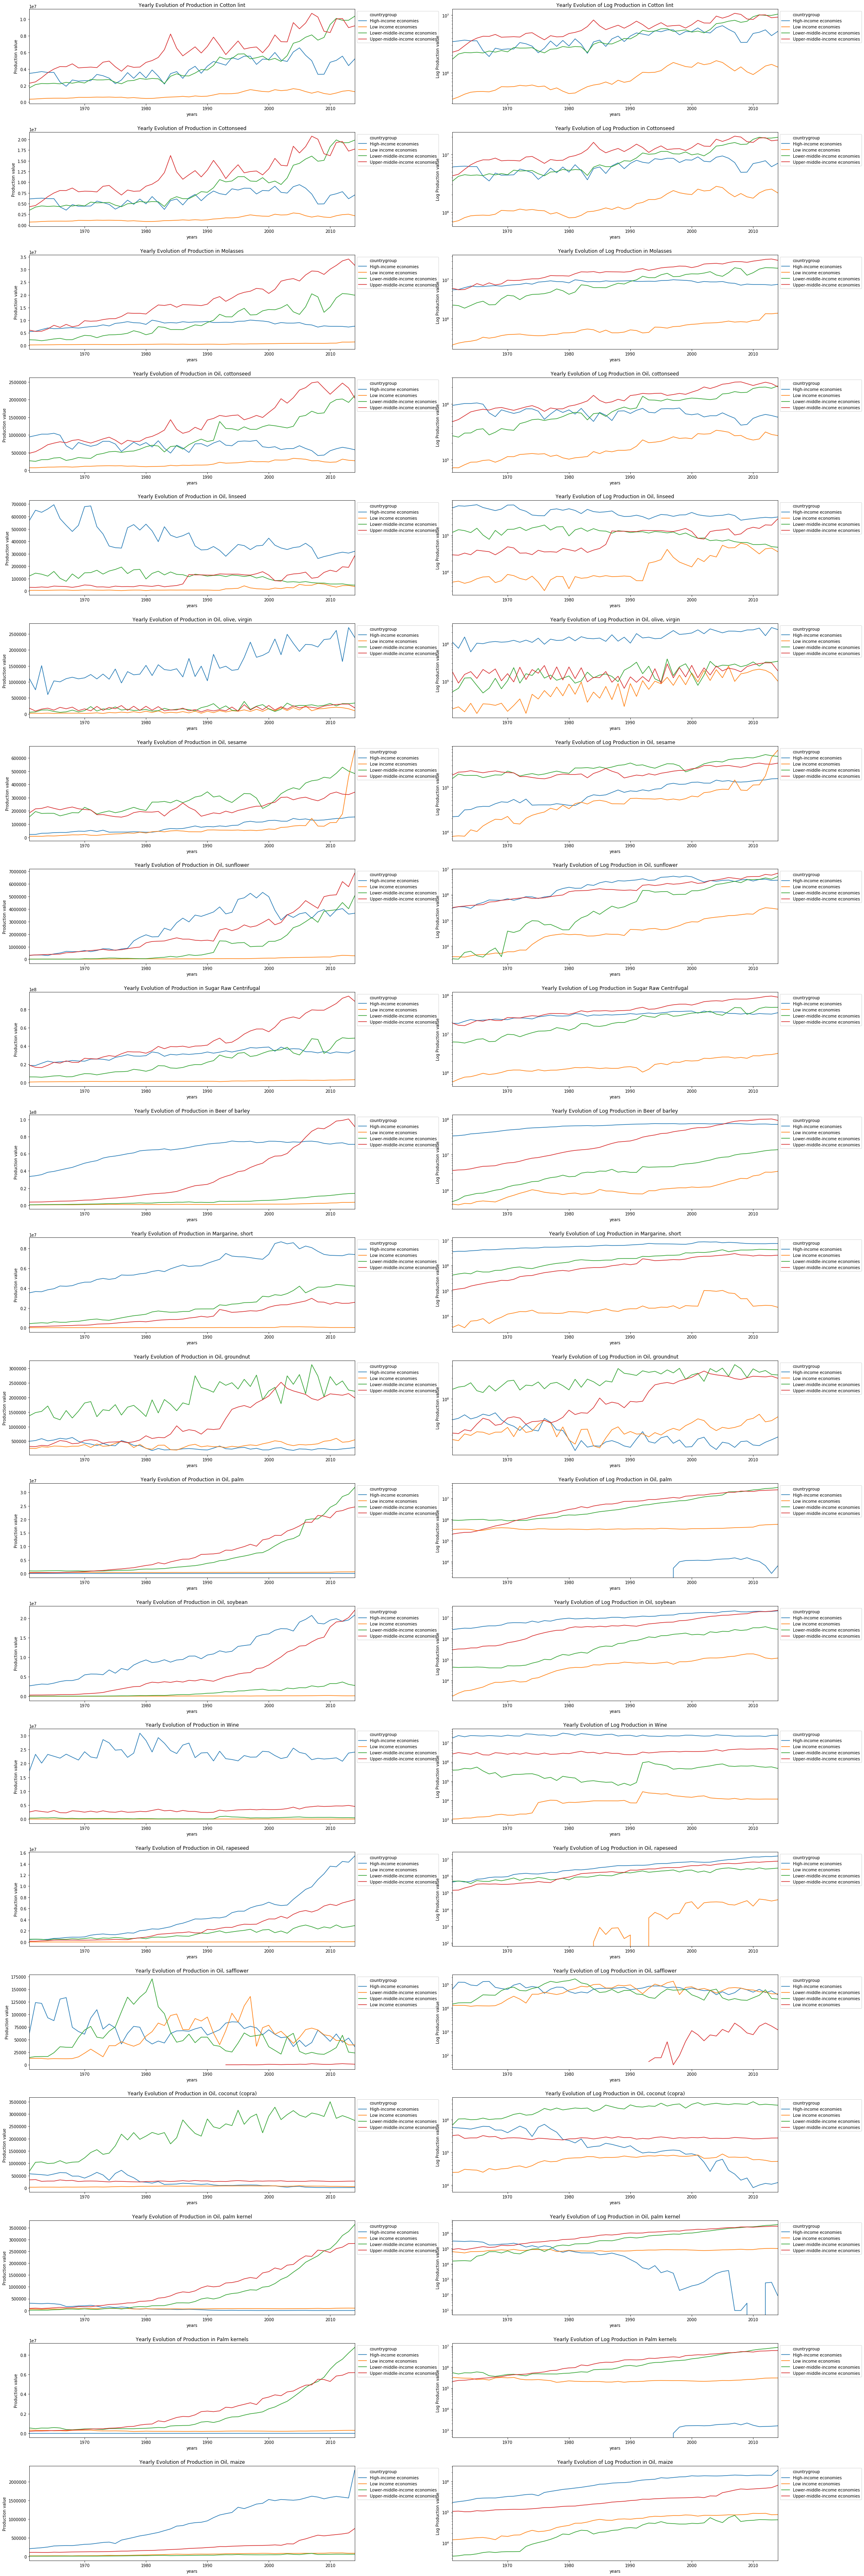

In [310]:
# should use widgets
item_list = production.item.unique()

fig, ax = plt.subplots( figsize = (15 * 2 * 1.1, 5 * len(item_list) * 1.1), nrows = len(item_list), ncols = 2)
plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.3)

for idx, val in tqdm(enumerate(item_list)):
    sns.lineplot(x = 'year', y = 'value', hue = 'countrygroup', \
                 data = incomes[incomes.item == val].groupby(['year', 'countrygroup']).agg({'value':'sum'}, axis = 1).reset_index(), \
                 ax = ax[idx][0])
    ax[idx][0].legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 1)
    ax[idx][0].set_title('Yearly Evolution of Production in '+ val)
    ax[idx][0].set_ylabel("Production value")
    ax[idx][0].set_yscale('linear')
    ax[idx][0].set_xlabel('years')
    ax[idx][0].set_xlim(left = 1961, right = 2014)

    sns.lineplot(x = 'year', y = 'value', hue = 'countrygroup', \
                 data = incomes[incomes.item == val].groupby(['year', 'countrygroup']).agg({'value':'sum'}, axis = 1).reset_index(), \
                 ax = ax[idx][1])
    ax[idx][1].legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 1)
    ax[idx][1].set_title('Yearly Evolution of Log Production in '+ val)
    ax[idx][1].set_ylabel("Log Production value")
    ax[idx][1].set_yscale('log')
    ax[idx][1].set_xlabel('years')
    ax[idx][1].set_xlim(left = 1961, right = 2014)   

# Grouping items together

## Look at each item separately

#### Both log and linear items together but can't see as clearly

21it [00:15,  1.49it/s]


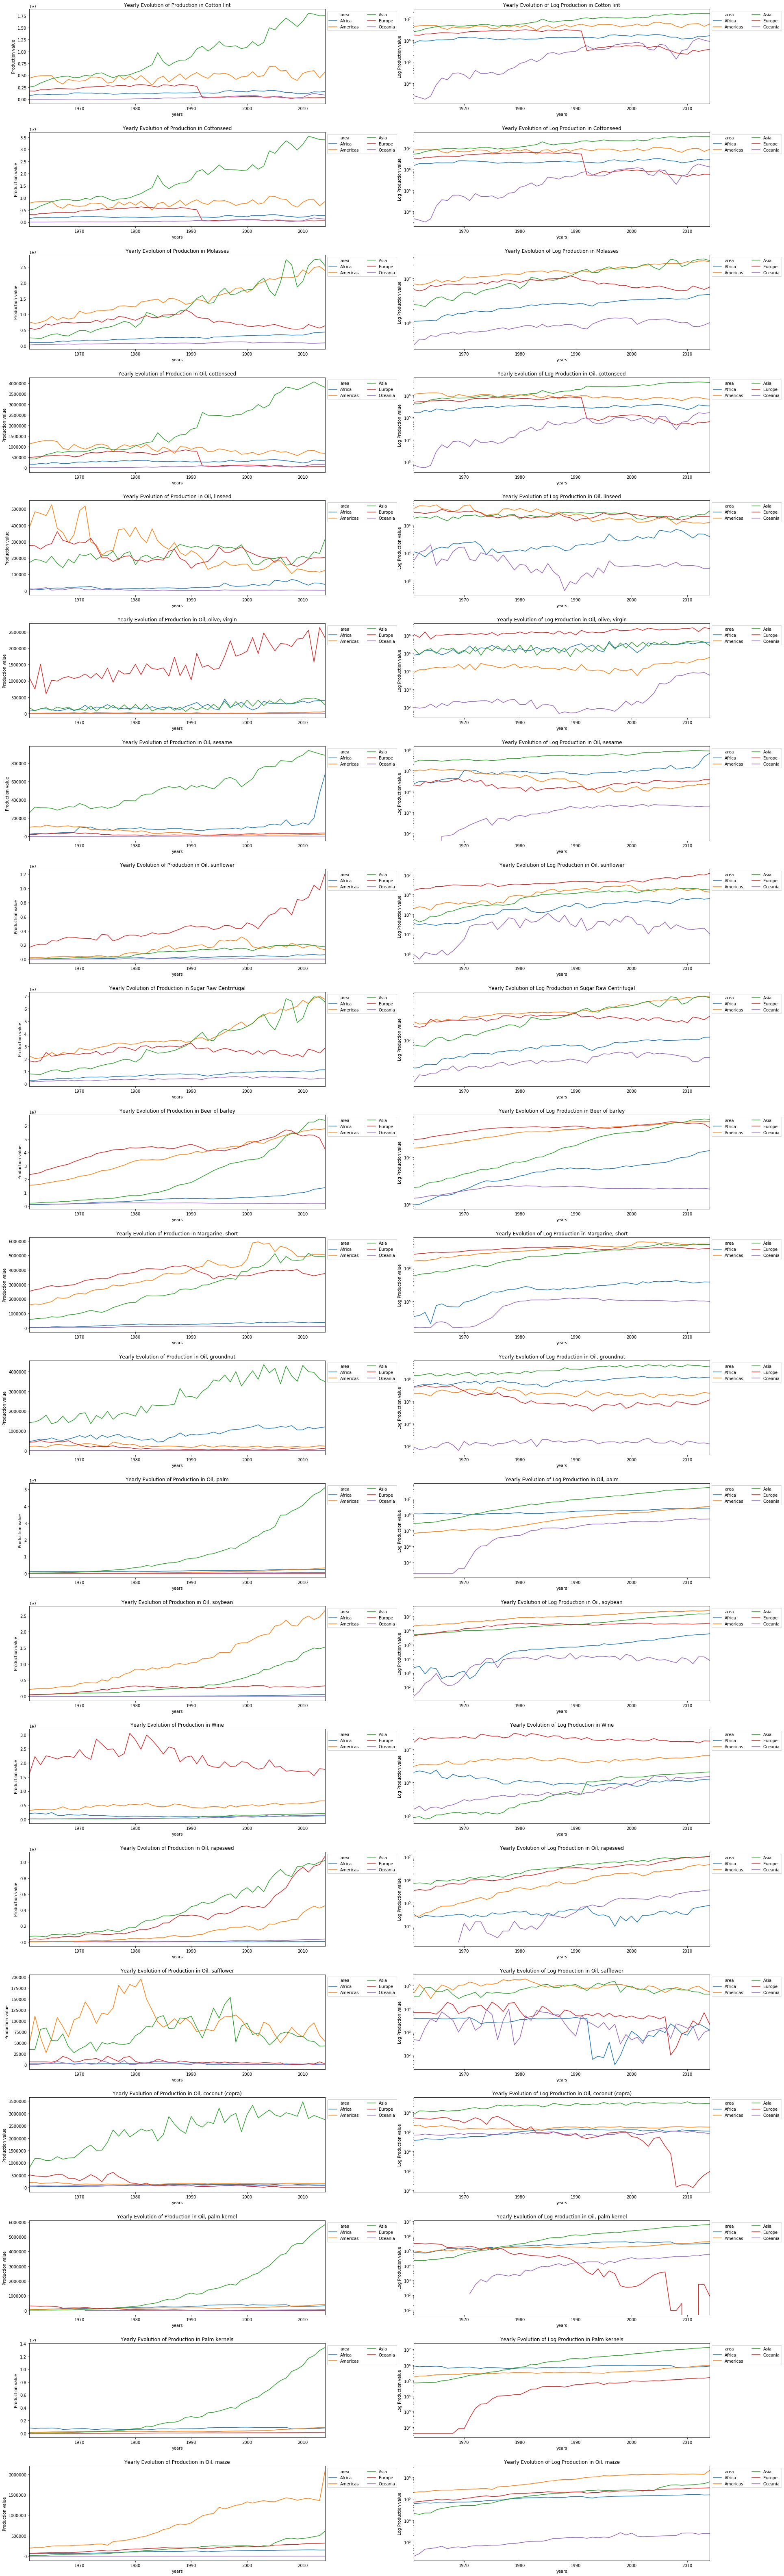

In [257]:
# should use widgets
item_list = production.item.unique()

fig, ax = plt.subplots( figsize = (15 * 2 * 1.1, 5 * len(item_list) * 1.1), nrows = len(item_list), ncols = 2)
plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.3)

for idx, val in tqdm(enumerate(item_list)):
    sns.lineplot(x = 'year', y = 'value', hue = 'area', \
                 data = continents[continents.item == val].groupby(['year', 'area']).agg({'value':'sum'}, axis = 1).reset_index(), \
                 ax = ax[idx][0])
    ax[idx][0].legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 2)
    ax[idx][0].set_title('Yearly Evolution of Production in '+ val)
    ax[idx][0].set_ylabel("Production value")
    ax[idx][0].set_yscale('linear')
    ax[idx][0].set_xlabel('years')
    ax[idx][0].set_xlim(left = 1961, right = 2014)

    sns.lineplot(x = 'year', y = 'value', hue = 'area', \
                 data = continents[continents.item == val].groupby(['year', 'area']).agg({'value':'sum'}, axis = 1).reset_index(), \
                 ax = ax[idx][1])
    ax[idx][1].legend(bbox_to_anchor = (1, 1), loc = 'upper left', ncol = 2)
    ax[idx][1].set_title('Yearly Evolution of Log Production in '+ val)
    ax[idx][1].set_ylabel("Log Production value")
    ax[idx][1].set_yscale('log')
    ax[idx][1].set_xlabel('years')
    ax[idx][1].set_xlim(left = 1961, right = 2014)
    
    
    

In [313]:
production.item.unique()

array(['Cotton lint', 'Cottonseed', 'Molasses', 'Oil, cottonseed',
       'Oil, linseed', 'Oil, olive, virgin', 'Oil, sesame',
       'Oil, sunflower', 'Sugar Raw Centrifugal', 'Beer of barley',
       'Margarine, short', 'Oil, groundnut', 'Oil, palm', 'Oil, soybean',
       'Wine', 'Oil, rapeseed', 'Oil, safflower', 'Oil, coconut (copra)',
       'Oil, palm kernel', 'Palm kernels', 'Oil, maize'], dtype=object)

It doesnt really seem to make sense to bundle some items together... 
Also the unit used is always the same but obviously some of these are harder to extract than others... 
so Analysis should maybe be done item-wise 

# Looking at flags

In [397]:
flags = load_dataframe(os.getcwd() + '\data\Flags.csv')
prod_flags = production.flag.unique()
# not picking up NaN which means both official data and Non Applicable

mask = [flags.flag[idx] in prod_flags for idx, val in enumerate(flags.flag)]
flags[mask]

flag                                              flags
1     *                                  Unofficial figure
2     A  Aggregate, may include official, semi-official...
10    F                                       FAO estimate
13   Fc                                    Calculated data
18   Im           FAO data based on imputation methodology
19    M                                 Data not available

In [442]:
production.count()
# nan dont show up as count so thats why flags is not showing up as many
# investigate value thing further, missing 5k ish

areacode       116502
area           116502
itemcode       116502
item           116502
elementcode    116502
element        116502
yearcode       116502
year           116502
unit           116502
value          111303
flag            90745
dtype: int64

In [433]:
production.groupby('flag').agg({'flag':'count'}).rename({'flag':'count'}, axis = 1).reset_index()

flag  count
0    *  14018
1    A  30983
2    F  10219
3   Fc  14402
4   Im  16127
5    M   4996

In [505]:
production.groupby(['flag','area']).agg({'flag':'count'}).rename({'flag':'count'}, axis = 1)\
        .reset_index().sort_values(['flag','count'], ascending = False).head()
# should look into whether some countries have too much weird data.

flag                  area  count
831    M                Norway    190
825    M                 Nepal    173
848    M          Saudi Arabia    152
824    M               Namibia    130
868    M  United Arab Emirates    126

# Reshaping data

In [510]:
new_prod = continents.drop(['areacode', 'itemcode','elementcode', 'element', 'yearcode', 'flag','unit'], axis = 1)
new_prod.melt(id_vars = ['year','area', 'item'],value_vars = 'value').sort_values(['year', 'area']).head()


year    area              item variable      value
0    1961  Africa    Beer of barley    value   963413.0
54   1961  Africa       Cotton lint    value   737289.0
108  1961  Africa        Cottonseed    value  1452123.0
162  1961  Africa  Margarine, short    value    35427.0
216  1961  Africa          Molasses    value  1067458.0